In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Index(['line_no', ' Core 0 lines ', ' Core 1 lines'], dtype='object')
line_no           65536
 Core 0 lines     65536
 Core 1 lines     65536
dtype: int64
line_no           9565
 Core 0 lines     9565
 Core 1 lines     9565
dtype: int64


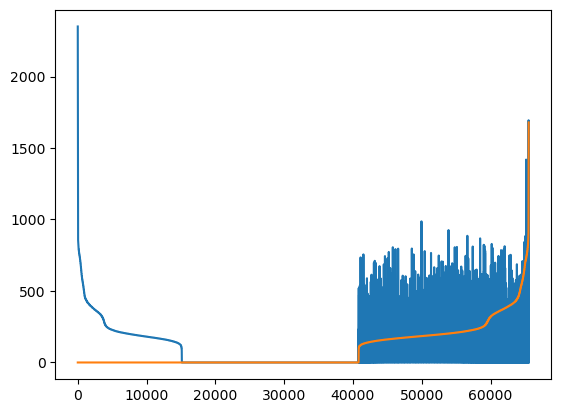

In [ ]:
data  = pd.read_csv("coverage_-1bc-0.trace.csv")
print(data.columns)
core_0 = np.array(data.sort_values([" Core 0 lines "," Core 1 lines"],ascending=[True,False])[" Core 0 lines "])
core_1 = np.array(data.sort_values([" Core 0 lines "," Core 1 lines"],ascending=[True,False])[" Core 1 lines"])
print(data.count())
print(data.loc[(data[" Core 0 lines "] != 0) & (data[" Core 1 lines"] != 0) ].count())

plt.plot(core_1)
plt.plot(core_0)